In [1]:
cd C:\Users\Mohammed\Downloads\orfinppro\pro\yolov5

C:\Users\Mohammed\Downloads\orfinppro\pro\yolov5


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Mohammed/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-2 Python-3.11.2 torch-2.2.0.dev20231027+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://resources.stuff.co.nz/content/dam/images/1/k/q/r/d/c/image.related.StuffLandscapeSixteenByNine.1420x800.1kseqt.png/1501707394942.jpg'
results = model(img)
results.print()
results.render()


KeyboardInterrupt



In [ ]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


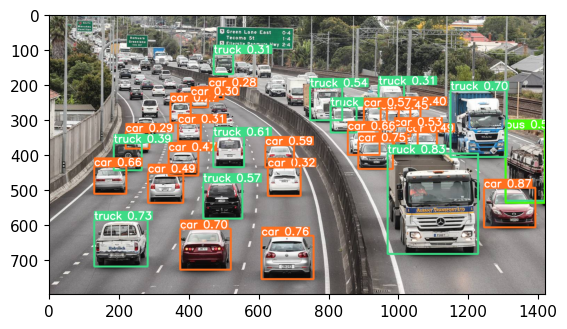

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10)== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2


github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2023-10-29 Python-3.9.18 torch-2.2.0.dev20231029+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\Users\Mohammed\Downloads\orfinppro\pro\yolov5\runs\train\exp\weights\last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Mohammed/.cache\torch\hub\master.zip
YOLOv5  2023-11-3 Python-3.11.2 torch-2.2.0.dev20231027+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 416x416 1 Neutral
Speed: 30.0ms pre-process, 480.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


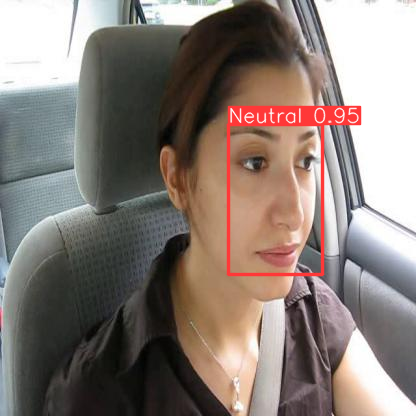

In [6]:
import os
img = os.path.join(r'C:\Users\Mohammed\Downloads\orfinppro\pro\data\test\images', '2_jpg.rf.b057079b62730eeefd5e838cf2cd7326.jpg')
resul = model(img)
resul.print()
resul.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    #frame = cv2.resize(frame, (416, 416))
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import time
cap = cv2.VideoCapture(0)

# Set the desired frames per second (FPS)
desired_fps = 45

# Calculate the delay between frames based on desired FPS
frame_delay = 1 / desired_fps

frame_counter = 0

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        # Process frames at the desired FPS
        frame_counter += 1
        if frame_counter % desired_fps == 0:
            # Make detections on the selected frames
            results = model(frame)
            cv2.imshow('YOLO', np.squeeze(results.render()))

        # Check for key press to exit the loop
        if cv2.waitKey(1) == ord('q'):
            break

    # Delay to achieve the desired FPS
    if frame_counter % desired_fps == 0:
        time.sleep(frame_delay)

cap.release()
cv2.destroyAllWindows()